In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

from xgboost import XGBRegressor
from xgboost import plot_importance

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
155,156,0,toyota carina,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778.0
105,106,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699.0
106,107,1,nissan clipper,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399.0
146,147,0,subaru trezia,gas,std,four,wagon,fwd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463.0
97,98,1,nissan note,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0
108,109,0,peugeot 304,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200.0
91,92,1,nissan rogue,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649.0
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
82,83,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0
115,116,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.shape

(205, 26)

In [8]:
df.price.value_counts()

8916.5     2
16500.0    2
7609.0     2
7898.0     2
6692.0     2
          ..
9988.0     1
6189.0     1
16558.0    1
9233.0     1
8499.0     1
Name: price, Length: 189, dtype: int64

<AxesSubplot:>

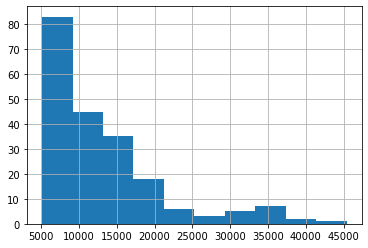

In [9]:
df.price.hist()

<AxesSubplot:xlabel='price'>

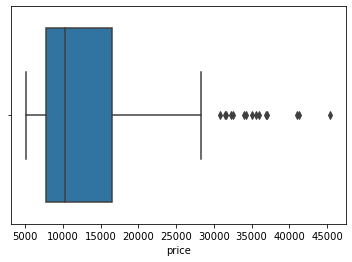

In [10]:
sns.boxplot(df.price)

In [11]:
iqr=df.price.quantile(.75)-df.price.quantile(.25)
print('IQR:',iqr)
ul=df.price.quantile(.75)+1.5*iqr
print('UL:',ul)
ll=df.price.quantile(.25)-1.5*iqr
print('LL:',ll)


IQR: 8715.0
UL: 29575.5
LL: -5284.5


In [12]:
len(df[df['price']>ul])

15

In [13]:
df.car_ID.value_counts()

1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64

In [14]:
df.car_ID.is_unique

True

In [15]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<AxesSubplot:xlabel='symboling', ylabel='count'>

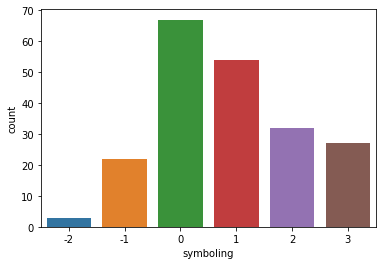

In [16]:
sns.countplot(df.symboling)

In [17]:
df.groupby('price')['symboling'].describe()

,count,mean,std,min,25%,50%,75%,max
price,,,,,,,,
5118.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
5151.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
5195.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
5348.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
5389.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
36880.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
37028.0,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
40960.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [18]:
df.CarName.is_unique

False

In [20]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<AxesSubplot:xlabel='fueltype', ylabel='count'>

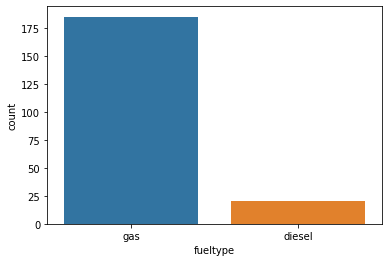

In [21]:
sns.countplot(df.fueltype)

In [22]:
df.groupby('price')['fueltype'].describe()

,count,unique,top,freq
price,,,,
5118.0,1,1,gas,1
5151.0,1,1,gas,1
5195.0,1,1,gas,1
5348.0,1,1,gas,1
5389.0,1,1,gas,1
...,...,...,...,...
36880.0,1,1,gas,1
37028.0,1,1,gas,1
40960.0,1,1,gas,1


In [23]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<AxesSubplot:xlabel='aspiration', ylabel='count'>

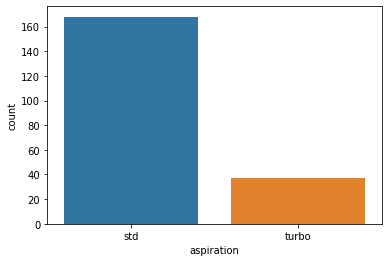

In [24]:
sns.countplot(df.aspiration)

In [25]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

<AxesSubplot:xlabel='doornumber', ylabel='count'>

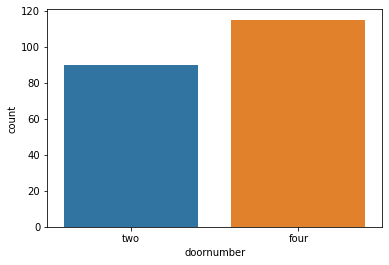

In [26]:
sns.countplot(df.doornumber)

In [27]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

<AxesSubplot:xlabel='carbody', ylabel='count'>

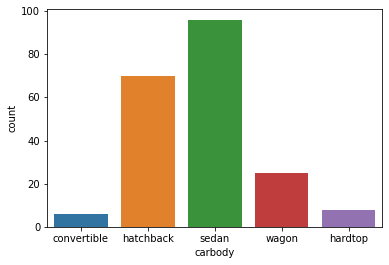

In [28]:
sns.countplot(df.carbody)

In [29]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

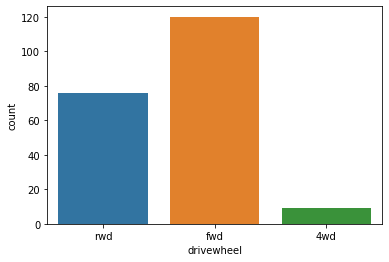

In [30]:
sns.countplot(df.drivewheel)

In [31]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

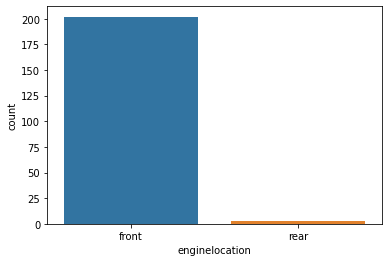

In [32]:
sns.countplot(df.enginelocation)

In [33]:
df.wheelbase.value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
98.4      7
97.3      7
104.3     6
96.3      6
98.8      6
107.9     6
100.4     6
99.1      6
93.1      5
95.9      5
102.4     5
109.1     5
97.2      5
101.2     4
97.0      4
114.2     4
95.3      4
89.5      3
105.8     3
110.0     3
103.5     3
104.5     2
103.3     2
104.9     2
102.9     2
91.3      2
115.6     2
99.8      2
113.0     2
96.9      2
86.6      2
96.1      2
88.6      2
112.0     1
93.3      1
95.1      1
102.7     1
93.0      1
102.0     1
99.4      1
99.5      1
94.3      1
99.2      1
96.6      1
106.7     1
120.9     1
88.4      1
108.0     1
96.0      1
Name: wheelbase, dtype: int64

In [35]:
df.carlength.value_counts()

157.3    15
188.8    11
186.7     7
166.3     7
171.7     7
         ..
157.1     1
181.5     1
191.7     1
180.3     1
158.8     1
Name: carlength, Length: 75, dtype: int64

<AxesSubplot:>

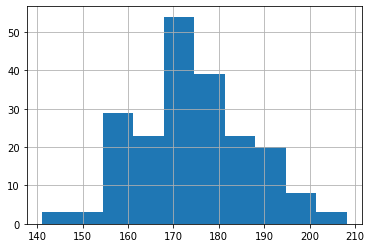

In [36]:
df.carlength.hist()

<AxesSubplot:xlabel='carlength'>

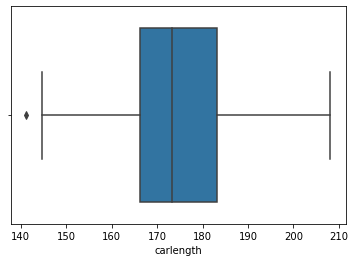

In [37]:
sns.boxplot(df.carlength)

In [38]:
iqr=df.carlength.quantile(.75)-df.carlength.quantile(.25)
print('IQR:',iqr)
ul=df.carlength.quantile(.75)+1.5*iqr
print('UL:',ul)
ll=df.carlength.quantile(.25)-1.5*iqr
print('LL:',ll)

IQR: 16.799999999999983
UL: 208.29999999999995
LL: 141.10000000000002


In [39]:
len(df[df['carlength']<ll])

1

In [40]:
df.carwidth.value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
68.4    10
64.4    10
64.0     9
65.5     8
65.2     7
67.2     6
66.3     6
64.2     6
65.6     6
67.9     5
66.9     5
64.8     4
68.9     4
65.7     4
65.0     3
70.3     3
71.7     3
63.9     3
71.4     3
66.1     2
64.6     2
64.1     2
68.3     2
69.6     2
67.7     2
66.0     1
63.4     1
61.8     1
62.5     1
66.6     1
70.9     1
60.3     1
70.6     1
72.3     1
72.0     1
66.2     1
68.0     1
68.8     1
70.5     1
66.4     1
Name: carwidth, dtype: int64

<AxesSubplot:>

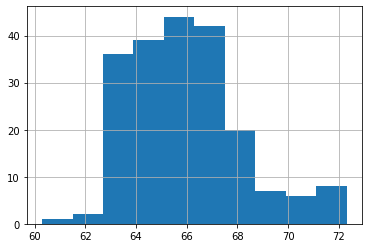

In [42]:
df.carwidth.hist()

In [43]:
df.carheight.value_counts()

50.8    14
52.0    12
55.7    12
54.5    10
54.1    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
54.9     6
50.2     6
52.8     6
53.0     6
53.7     5
55.1     5
50.6     5
58.7     4
53.3     4
49.6     4
57.5     3
52.5     3
49.7     3
56.2     3
53.5     3
59.1     3
53.9     2
48.8     2
54.7     2
49.4     2
50.5     2
51.4     2
54.4     2
56.5     2
56.3     2
59.8     2
58.3     1
56.0     1
55.4     1
55.6     1
52.4     1
54.8     1
53.1     1
51.0     1
53.2     1
47.8     1
55.2     1
55.9     1
Name: carheight, dtype: int64

In [44]:
df.curbweight.value_counts()

2385    4
1918    3
1989    3
2275    3
4066    2
       ..
3685    1
3430    1
2921    1
1900    1
3071    1
Name: curbweight, Length: 171, dtype: int64

<AxesSubplot:>

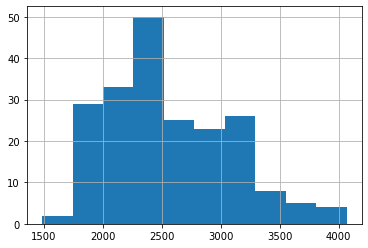

In [45]:
df.curbweight.hist()

<AxesSubplot:xlabel='curbweight'>

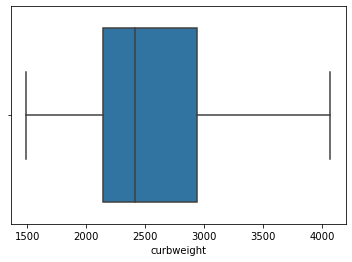

In [46]:
sns.boxplot(df.curbweight)

In [47]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

<AxesSubplot:xlabel='enginetype', ylabel='count'>

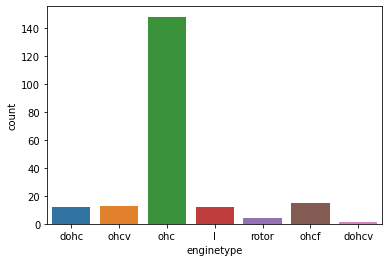

In [48]:
sns.countplot(df.enginetype)

In [49]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

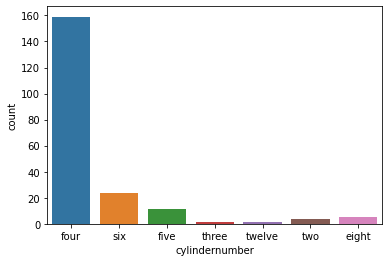

In [50]:
sns.countplot(df.cylindernumber)

In [51]:
df.enginesize.value_counts()

92     15
122    15
98     14
97     14
108    13
90     12
110    12
109     8
120     7
141     7
146     6
152     6
181     6
121     6
91      5
136     5
156     5
130     4
183     4
164     3
171     3
194     3
70      3
209     3
140     2
258     2
134     2
132     2
234     2
131     2
145     1
119     1
151     1
111     1
103     1
161     1
79      1
173     1
326     1
61      1
308     1
203     1
304     1
80      1
Name: enginesize, dtype: int64

<AxesSubplot:xlabel='enginesize', ylabel='count'>

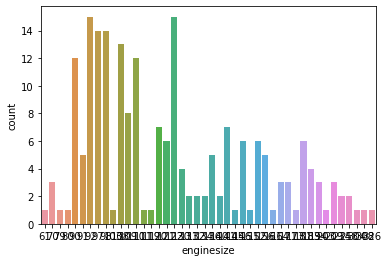

In [52]:
sns.countplot(df.enginesize)

In [53]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

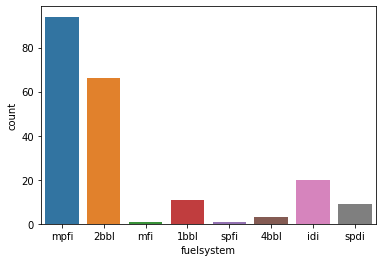

In [54]:
sns.countplot(df.fuelsystem)

In [55]:
df.boreratio.value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.43     8
3.31     8
2.91     7
3.27     7
3.05     6
3.33     6
3.54     6
3.39     6
3.58     6
3.70     5
3.01     5
3.35     4
3.74     3
3.17     3
3.59     3
3.63     2
3.24     2
3.80     2
3.13     2
3.47     2
3.94     2
3.50     2
3.76     1
3.60     1
2.92     1
3.08     1
2.54     1
2.68     1
3.34     1
3.61     1
2.99     1
Name: boreratio, dtype: int64

<AxesSubplot:xlabel='boreratio', ylabel='count'>

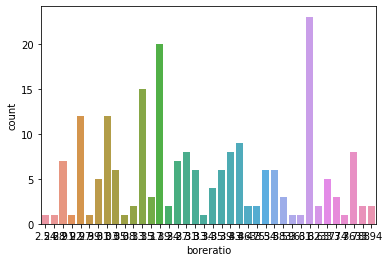

In [56]:
sns.countplot(df.boreratio)

In [57]:
df.stroke.value_counts()

3.400    20
3.150    14
3.230    14
3.030    14
3.390    13
2.640    11
3.350     9
3.290     9
3.460     8
3.500     6
3.270     6
3.110     6
3.580     6
3.070     6
3.410     6
3.190     6
3.640     5
3.520     5
3.540     4
3.860     4
3.255     4
3.470     4
3.900     3
2.900     3
3.080     2
3.100     2
2.190     2
4.170     2
2.800     2
2.680     2
3.160     1
2.070     1
3.210     1
2.760     1
3.120     1
2.360     1
2.870     1
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

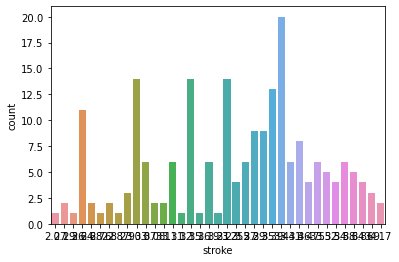

In [58]:
sns.countplot(df.stroke)

In [59]:
df.compressionratio.value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
23.00     5
21.00     5
9.60      5
8.60      5
8.40      5
7.50      5
7.60      4
21.50     4
8.30      3
22.50     3
8.80      3
10.00     3
8.10      2
7.70      2
10.10     1
9.41      1
7.80      1
22.00     1
9.10      1
22.70     1
11.50     1
21.90     1
9.31      1
Name: compressionratio, dtype: int64

<AxesSubplot:xlabel='compressionratio', ylabel='count'>

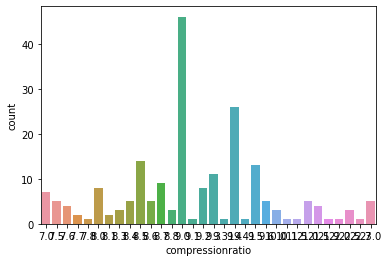

In [60]:
sns.countplot(df.compressionratio)

In [61]:
df.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
160     6
88      6
101     6
62      6
114     6
76      5
90      5
84      5
82      5
102     5
145     5
97      5
111     4
123     4
86      4
92      4
121     3
152     3
182     3
207     3
85      3
73      3
94      2
155     2
100     2
184     2
112     2
176     2
56      2
162     2
161     2
52      2
156     2
154     1
175     1
48      1
200     1
55      1
140     1
143     1
142     1
135     1
134     1
58      1
60      1
120     1
64      1
115     1
72      1
78      1
106     1
288     1
262     1
Name: horsepower, dtype: int64

<AxesSubplot:xlabel='horsepower', ylabel='count'>

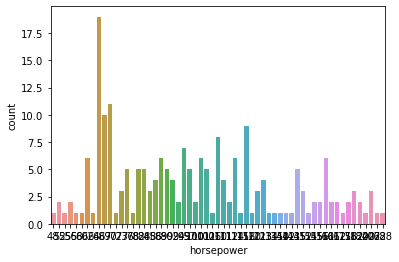

In [62]:
sns.countplot(df.horsepower)

<AxesSubplot:>

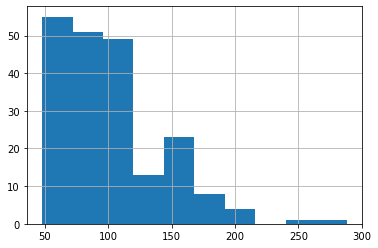

In [63]:
df.horsepower.hist()

In [64]:
df.peakrpm.value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
5800     7
4500     7
5100     5
4150     5
4200     5
4750     4
4350     4
4250     3
4400     3
5900     3
6600     2
5750     1
5300     1
4650     1
5600     1
4900     1
Name: peakrpm, dtype: int64

<AxesSubplot:xlabel='peakrpm', ylabel='count'>

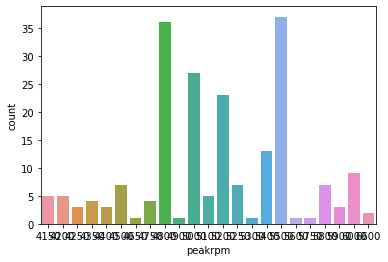

In [65]:
sns.countplot(df.peakrpm)

<AxesSubplot:>

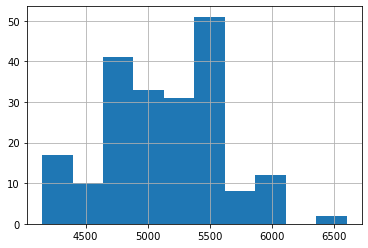

In [66]:
df.peakrpm.hist()

In [67]:
df.citympg.value_counts()

31    28
19    27
24    22
27    14
17    13
23    12
26    12
21     8
25     8
30     8
28     7
38     7
16     6
37     6
22     4
20     3
18     3
29     3
15     3
14     2
36     1
47     1
45     1
13     1
35     1
34     1
33     1
32     1
49     1
Name: citympg, dtype: int64

<AxesSubplot:xlabel='citympg', ylabel='count'>

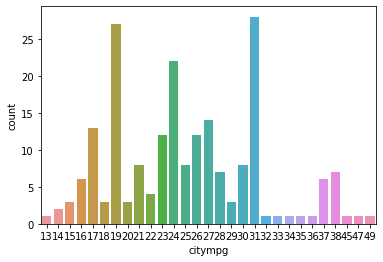

In [68]:
sns.countplot(df.citympg)

<AxesSubplot:>

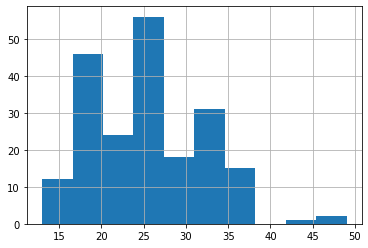

In [69]:
df.citympg.hist()

In [70]:
df.highwaympg.value_counts()

25    19
38    17
24    17
30    16
32    16
34    14
28    13
37    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
26     3
42     3
41     3
46     2
39     2
47     2
16     2
36     2
20     2
19     2
18     2
17     1
50     1
53     1
54     1
Name: highwaympg, dtype: int64

<AxesSubplot:xlabel='highwaympg', ylabel='count'>

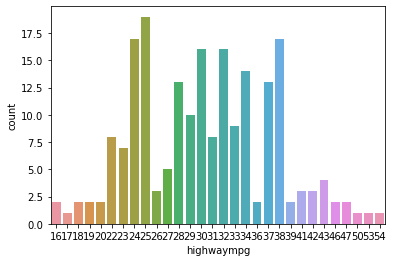

In [71]:
sns.countplot(df.highwaympg)

In [72]:
df=df.drop(['car_ID','CarName'], axis=1)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [73]:
numerical= df.drop(['price'], axis=1).select_dtypes('number').columns
numerical

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [74]:
categorical = df.select_dtypes('object').columns
categorical

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [75]:
corrmat=df.corr()
corrmat

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<AxesSubplot:>

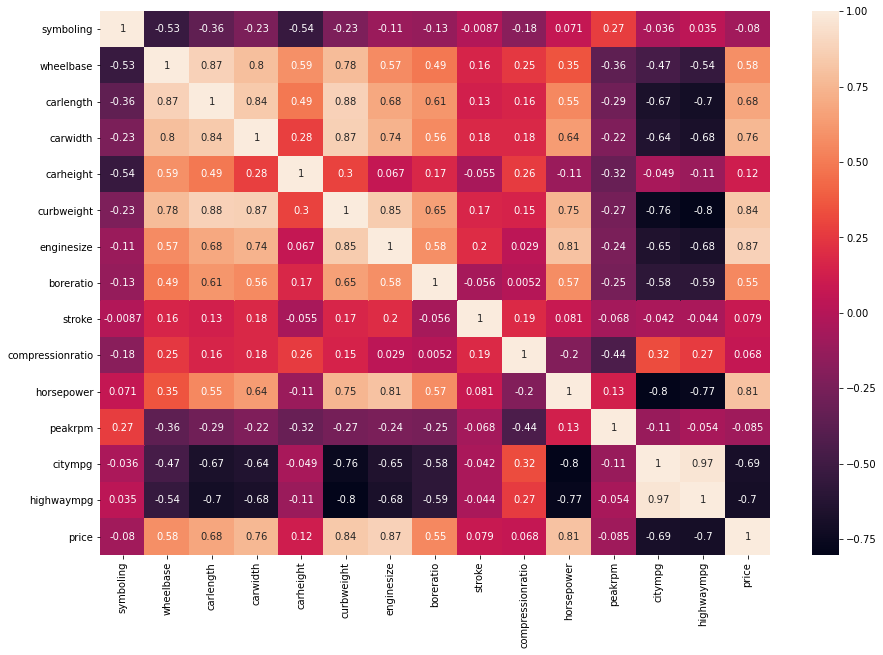

In [76]:
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(corrmat,annot=True)

In [78]:
df = df.drop('citympg',axis=1)

In [79]:
df[categorical].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [87]:
df=df.drop(['carheight','stroke','compressionratio','carwidth','carlength','symboling'],axis=1)
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,111,5000,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,111,5000,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,154,5000,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,102,5500,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,115,5500,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,2952,ohc,four,141,mpfi,3.78,114,5400,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,3049,ohc,four,141,mpfi,3.78,160,5300,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,3012,ohcv,six,173,mpfi,3.58,134,5500,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,3217,ohc,six,145,idi,3.01,106,4800,27,22470.0


In [88]:
df1 = pd.get_dummies(df, columns=categorical,drop_first=True)

In [89]:
df1

,wheelbase,curbweight,enginesize,boreratio,horsepower,peakrpm,highwaympg,price,fueltype_gas,aspiration_turbo,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,2548,130,3.47,111,5000,27,13495.0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,2548,130,3.47,111,5000,27,16500.0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,2823,152,2.68,154,5000,26,16500.0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,2337,109,3.19,102,5500,30,13950.0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,2824,136,3.19,115,5500,22,17450.0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,2952,141,3.78,114,5400,28,16845.0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,109.1,3049,141,3.78,160,5300,25,19045.0,1,1,...,0,0,0,0,0,0,0,1,0,0
202,109.1,3012,173,3.58,134,5500,23,21485.0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,109.1,3217,145,3.01,106,4800,27,22470.0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [90]:
x=df1.drop('price',axis=1)

In [91]:
y=df1['price']

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [93]:
model=LinearRegression()

In [94]:
model.fit(x_train,y_train)

LinearRegression()

In [95]:
ypred=model.predict(x_test)

In [96]:
ypred

array([28425.21156862, 22593.09149619, 10794.53388645, 13024.78628039,
       26120.82092624,  6551.87160881,  7792.8451047 ,  6880.79117616,
        9056.66370669,  8261.70495771, 18185.29676781,  7457.50770248,
       15638.71313185, 10045.68559409, 42799.85727739,  5485.66325756,
       12315.55407018, 14093.58469072, 10591.50236066, 10720.33846187,
       10378.45271578, 16624.06017817,  7436.37224372,  2711.01153081,
        6947.18988868, 29300.49330353, 14822.50151282, 15933.3497354 ,
        4726.7240686 , 17491.69585426, 27052.98413338,  6421.83120058,
        4912.45498739, 17244.55457569,  6729.21025685, 27092.92462284,
       12655.81762303, 13617.29279152,  6623.97394721, 14595.97307758,
        6747.6610328 , 13374.60550627, 13770.74519196,  5081.53268432,
        6595.39092246,  9829.34670428,  6421.83120058,  6193.62229139,
       16656.59605859, 16413.36578711,  6070.64199747, 20692.39494055,
        7225.92878534, 10044.80087112,  4654.68532654, 17342.9949447 ,
      

In [99]:
print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, ypred))}, r2 score is {r2_score(y_test, ypred)}')

model : LinearRegression() and  rmse score is : 2967.8757223992893, r2 score is 0.8728676437581071


In [103]:
rmse_test =[]
r2_test =[]
model_names =[]



X= df1.drop('price', axis=1)
y= df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 1995.84, r2 score is 0.9425
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 2407.68, r2 score is 0.9163
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 2296.17, r2 score is 0.9239
model : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) and  rmse score is : 2692.32, r2 score is 0.8954


,RMSE,R2_Test
RandomForest,1995.84,0.94
GradientBoost,2407.68,0.92
ExtraTree,2296.17,0.92
XGB,2692.32,0.90
